In [1]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

<Figure size 640x480 with 0 Axes>

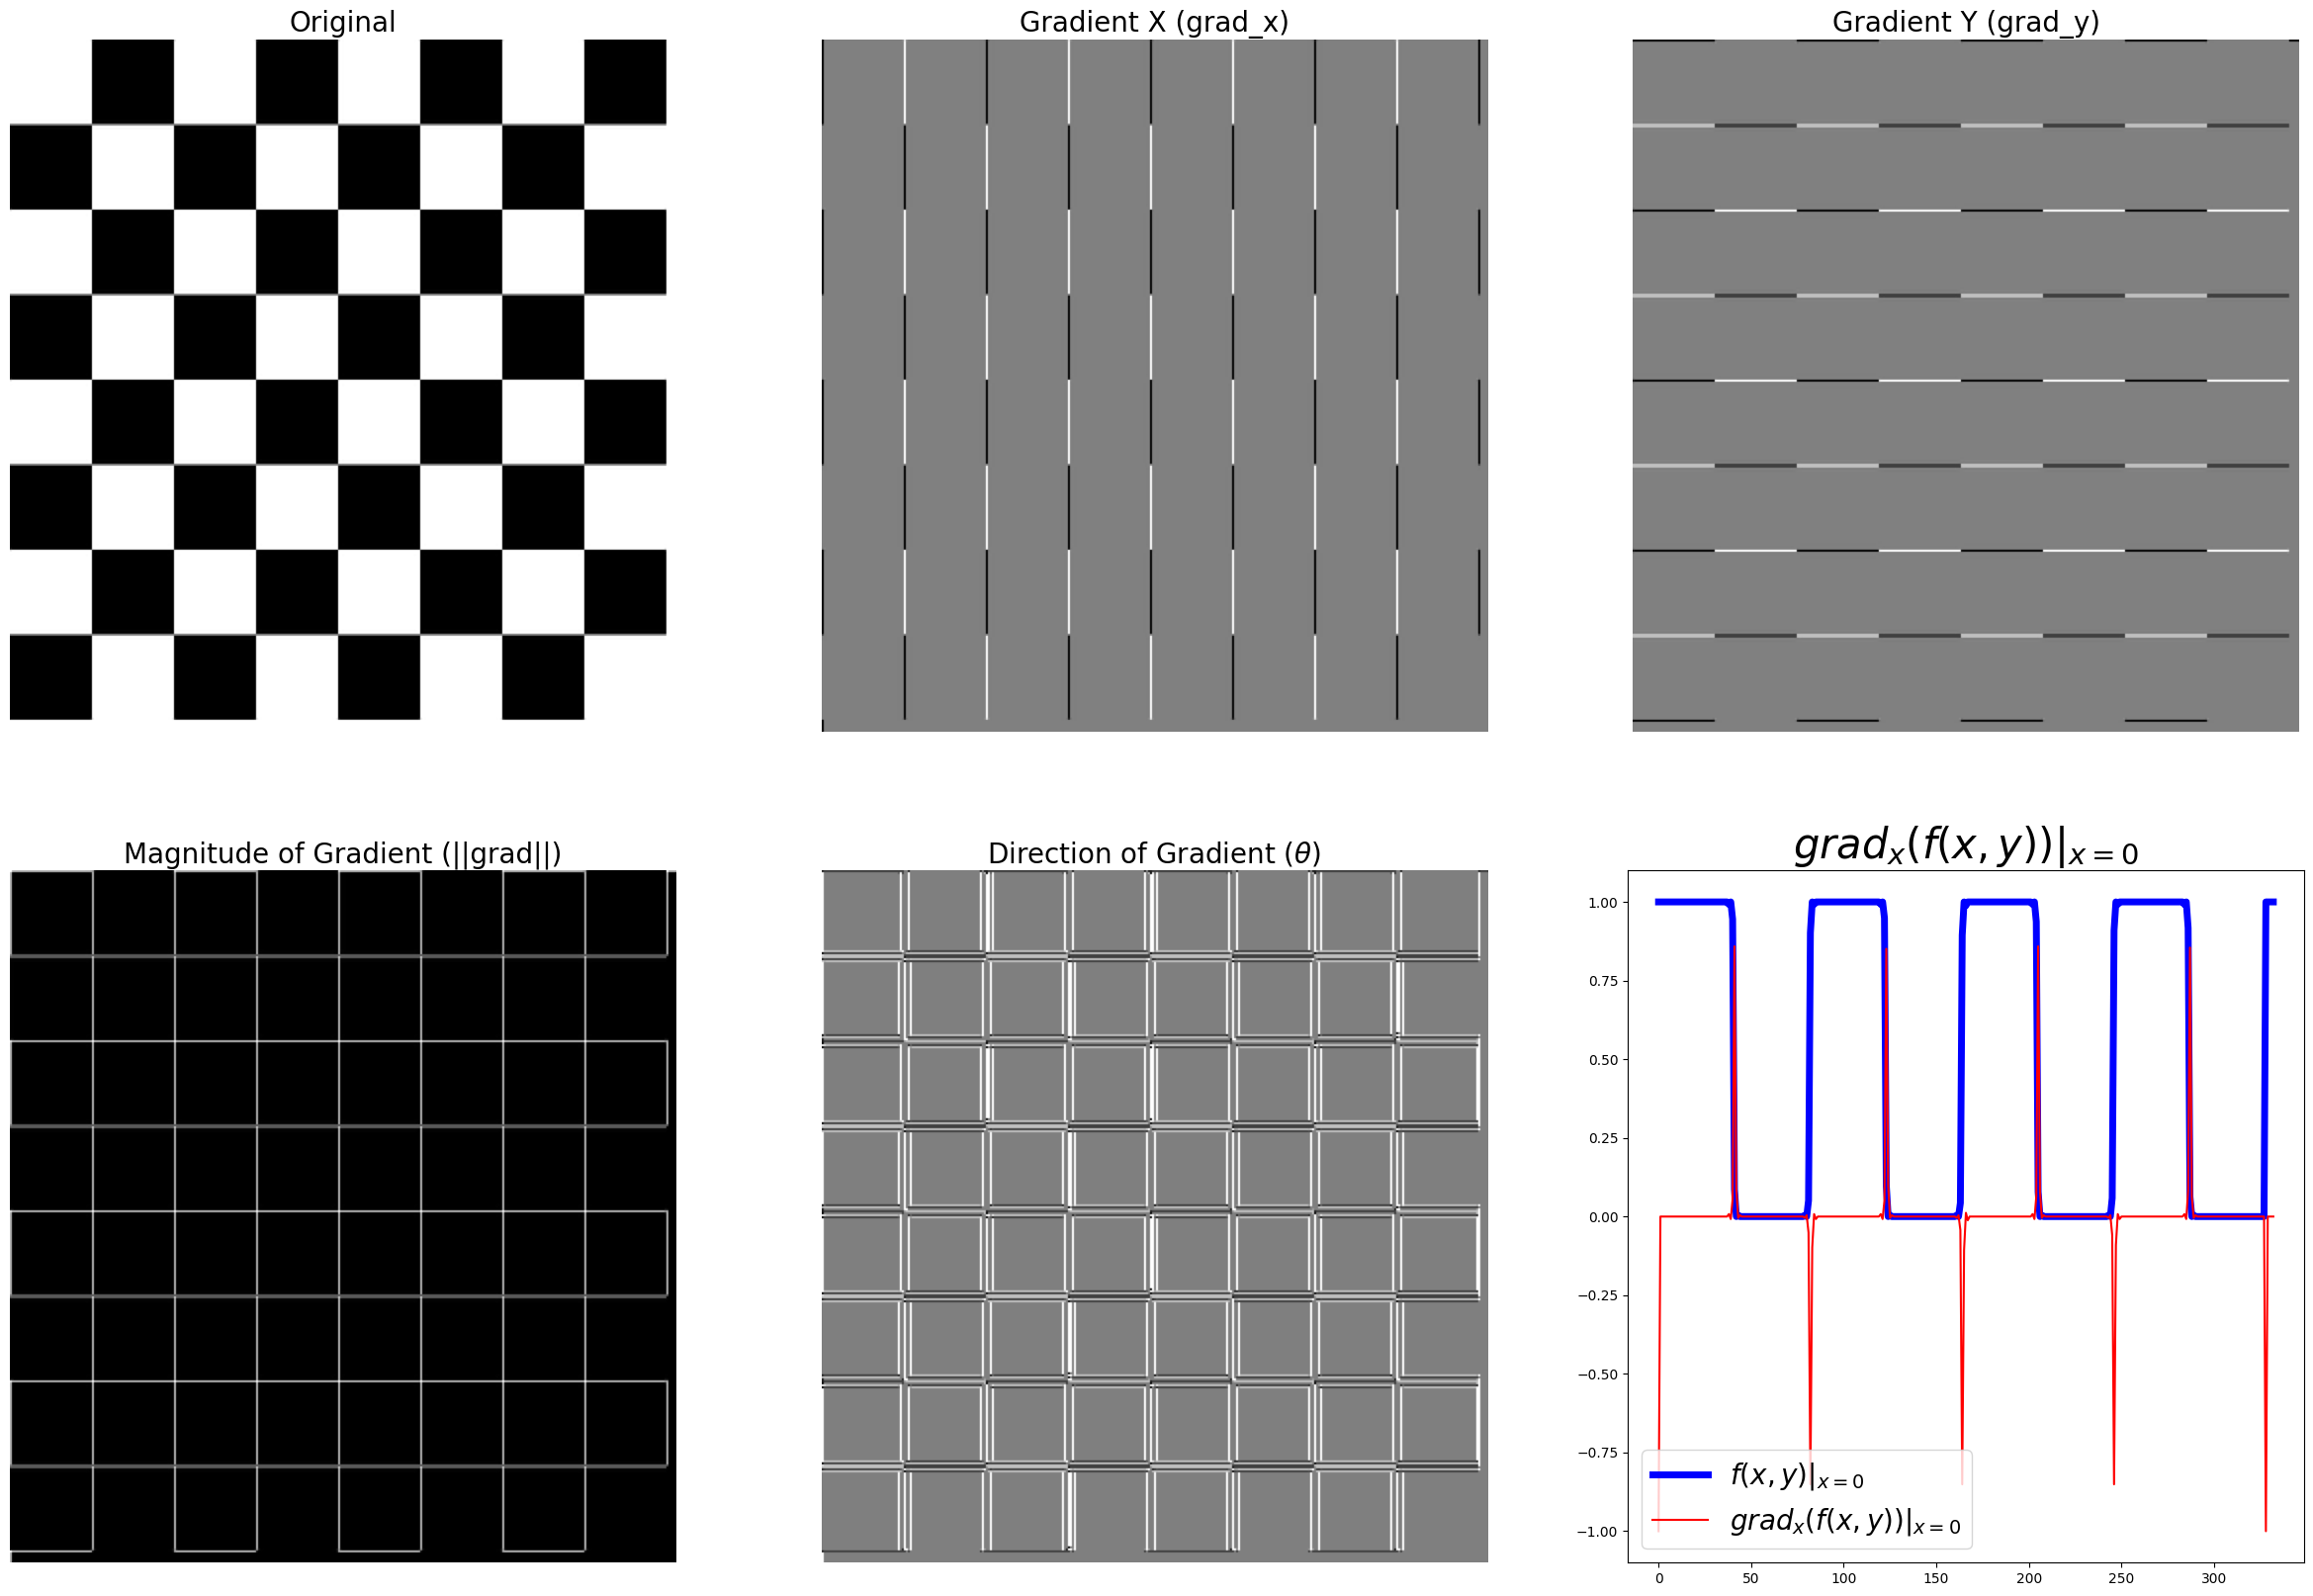

In [ ]:
# Hàm để hiển thị ảnh với tiêu đề tùy chỉnh
def plot_image(image, title):
    # Hiển thị ảnh với tiêu đề và loại bỏ trục tọa độ
    pylab.imshow(image), pylab.title(title, size=20), pylab.axis('off')

# Định nghĩa các kernel cho tính gradient theo trục x và y
ker_x = [[-1, 1]]  # Kernel để tính gradient theo hướng x
ker_y = [[-1], [1]]  # Kernel để tính gradient theo hướng y

# Đọc ảnh từ file và kiểm tra số kênh màu
im = imread('images/chess.png')

# Kiểm tra xem ảnh có kênh Alpha không và loại bỏ nếu có
if im.shape[2] == 4:
    im = im[..., :3]  # Lấy ba kênh đầu tiên (RGB)

# Chuyển ảnh RGB sang ảnh xám
im = rgb2gray(im)

# Tính gradient theo trục x bằng cách sử dụng tích chập (convolution) với ker_x
im_x = signal.convolve2d(im, ker_x, mode='same')

# Tính gradient theo trục y bằng cách sử dụng tích chập với ker_y
im_y = signal.convolve2d(im, ker_y, mode='same')

# Tính độ lớn của gradient (magnitude) tại mỗi pixel
im_mag = np.sqrt(im_x ** 2 + im_y ** 2)

# Tính hướng của gradient (direction) tại mỗi pixel
im_dir = np.arctan2(im_y, im_x)

# Đặt kiểu hiển thị ảnh xám
pylab.gray()

# Tạo một khung hình với kích thước lớn hơn để hiển thị các kết quả
pylab.figure(figsize=(30, 20))

# Hiển thị ảnh gốc
pylab.subplot(231)
plot_image(im, 'Original')

# Hiển thị ảnh gradient theo trục x
pylab.subplot(232)
plot_image(im_x, 'Gradient X (grad_x)')

# Hiển thị ảnh gradient theo trục y
pylab.subplot(233)
plot_image(im_y, 'Gradient Y (grad_y)')

# Hiển thị độ lớn của gradient
pylab.subplot(234)
plot_image(im_mag, 'Magnitude of Gradient (||grad||)')

# Hiển thị hướng của gradient
pylab.subplot(235)
plot_image(im_dir, r'Direction of Gradient ($\theta$)')

# Vẽ đồ thị của một hàng đầu tiên của ảnh gốc và gradient theo trục x tại hàng đầu tiên
pylab.subplot(236)
pylab.plot(range(im.shape[1]), im[0, :], 'b-', label=r'$f(x,y)|_{x=0}$', linewidth=5)
pylab.plot(range(im.shape[1]), im_x[0, :], 'r-', label=r'$grad_x(f(x,y))|_{x=0}$')
pylab.title(r'$grad_x (f(x,y))|_{x=0}$', size=30)
pylab.legend(prop={'size': 20})

# Hiển thị tất cả các biểu đồ và hình ảnh
pylab.show()

<Figure size 640x480 with 0 Axes>

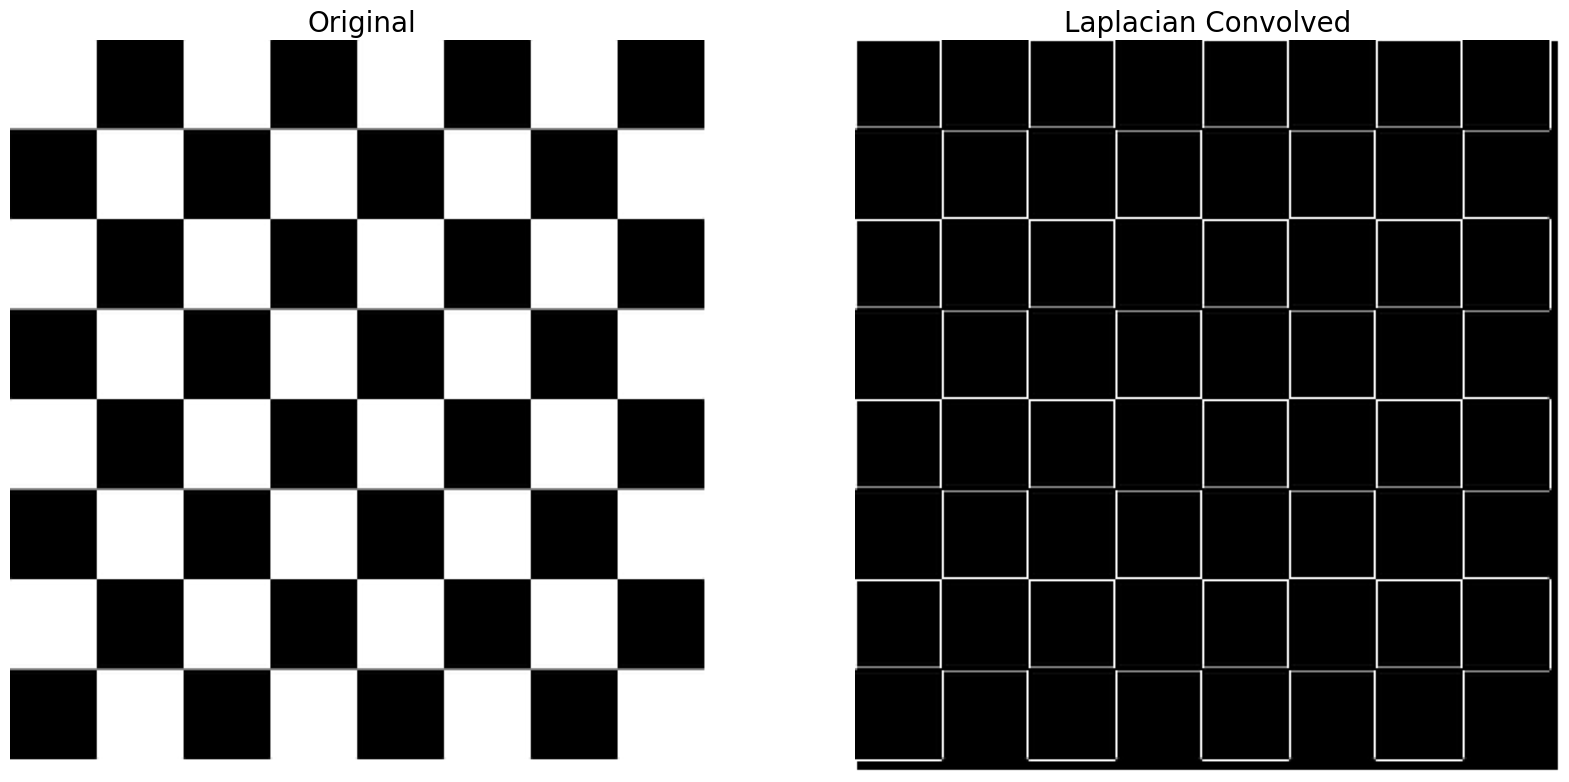

In [7]:
# Định nghĩa kernel Laplacian để tăng cường các cạnh của ảnh
ker_laplacian = [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]

# Đọc ảnh từ file và chuyển đổi sang ảnh xám
im = imread('images/chess.png')

# Kiểm tra xem ảnh có kênh Alpha không và loại bỏ nếu có
if im.shape[2] == 4:
    im = im[..., :3]  # Lấy ba kênh đầu tiên (RGB)

# Chuyển đổi ảnh RGB sang ảnh xám
im = rgb2gray(im)

# Áp dụng tích chập (convolution) với kernel Laplacian để làm nổi bật các cạnh
# Kết quả sau khi áp dụng convolution được giới hạn (clip) trong khoảng [0, 1] để giữ giá trị hợp lệ
im1 = np.clip(signal.convolve2d(im, ker_laplacian, mode='same'), 0, 1)

# Đặt kiểu hiển thị ảnh xám
pylab.gray()

# Tạo một khung hình với kích thước lớn hơn để hiển thị các kết quả
pylab.figure(figsize=(20, 10))

# Hiển thị ảnh gốc
pylab.subplot(121)
plot_image(im, 'Original')

# Hiển thị ảnh sau khi áp dụng kernel Laplacian
pylab.subplot(122)
plot_image(im1, 'Laplacian Convolved')

# Hiển thị tất cả các hình ảnh
pylab.show()


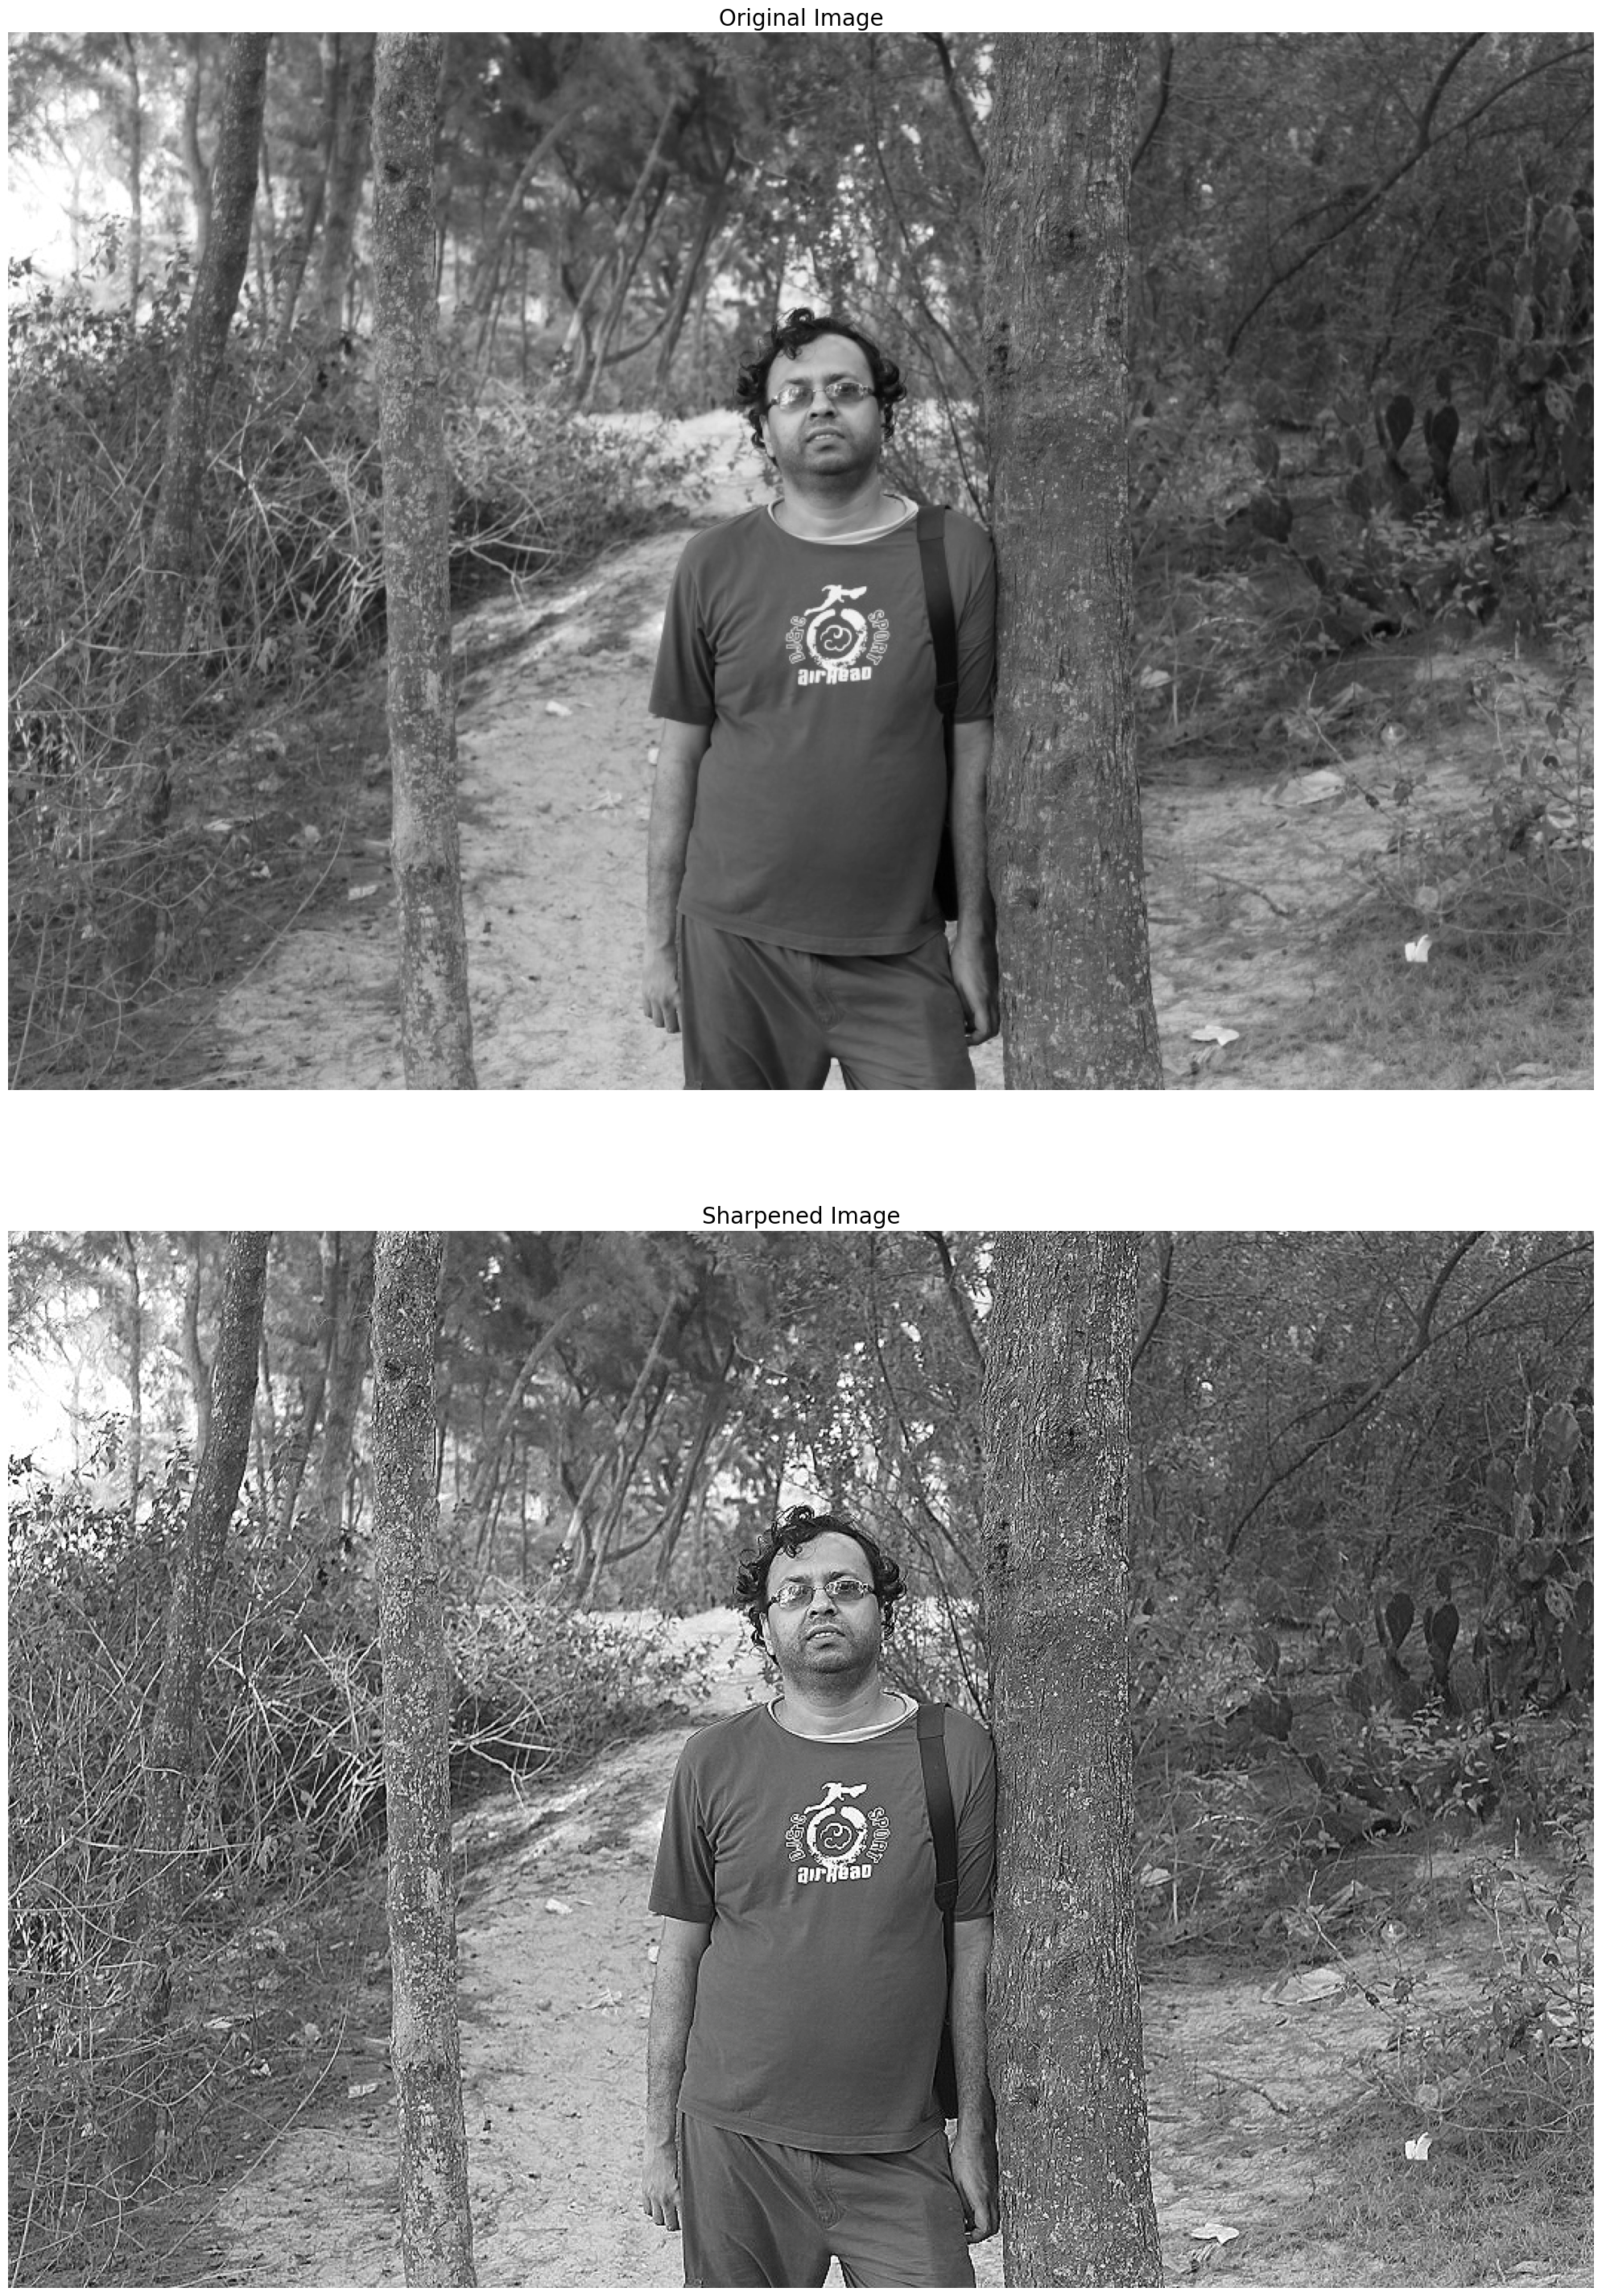

In [8]:
from skimage.filters import laplace
# Đọc ảnh từ đường dẫn và chuyển đổi sang ảnh xám
im = rgb2gray(imread('images/me8.jpg'))

# Áp dụng bộ lọc Laplace để tính toán các cạnh của ảnh
# Thêm kết quả của bộ lọc Laplace vào ảnh gốc để làm sắc nét ảnh (image sharpening)
# np.clip được sử dụng để giữ giá trị trong khoảng [0, 1] (hợp lệ cho hiển thị ảnh)
im1 = np.clip(laplace(im) + im, 0, 1)

# Tạo khung hình lớn để hiển thị các kết quả
pylab.figure(figsize=(20, 30))

# Hiển thị ảnh gốc
pylab.subplot(211)
plot_image(im, 'Original Image')

# Hiển thị ảnh sau khi làm sắc nét bằng bộ lọc Laplace
pylab.subplot(212)
plot_image(im1, 'Sharpened Image')

# Điều chỉnh bố cục để các ảnh không bị chồng lên nhau
pylab.tight_layout()

# Hiển thị tất cả các hình ảnh
pylab.show()
